# Ninad Karlekar


## 1) Problem statement

- Building a Resume Parser Using NLP and Machine Learning


In [2]:
import pandas as pd
import spacy
import nltk
import matplotlib.pyplot as plt

nltk.download("averaged_perceptron_tagger")
from nltk import pos_tag
from nltk.corpus import stopwords

nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")
import string
import re
import os

import warnings as wg

wg.filterwarnings("ignore")


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## 2) Data Collection

- Dataset Source - https://www.kaggle.com/datasets/gauravduttakiit/resume-dataset


## Displaying the skills required


In [3]:
skills = "Data mining or extracting usable data from valuable data sources Using machine learning tools to select features, create and optimize classifiers Carrying out preprocessing of structured and unstructured data Enhancing data collection procedures to include all relevant information for developing analytic systems Processing, cleansing, and validating the integrity of data to be used for analysis Analyzing large amounts of information to find patterns and solutions Developing prediction systems and machine learning algorithms Presenting results in a clear manner Propose solutions and strategies to tackle business challenges Collaborate with Business and IT teams Become a Data Science Expert & Get Your Dream Job Professional Certificate Program In Data ScienceEXPLORE PROGRAMBecome a Data Science Expert & Get Your Dream Job Data Scientist Skills You need to master the skills required for data scientist jobs in various industries and organizations if you want to pursue a data scientist career. Let’s look at the must-have data scientist qualifications. Key skills needed to become a data scientist: Programming Skills – knowledge of statistical programming languages like R, Python, and database query languages like SQL, Hive, Pig is desirable. Familiarity with Scala, Java, or C++ is an added advantage. Statistics – Good applied statistical skills, including knowledge of statistical tests, distributions, regression, maximum likelihood estimators, etc. Proficiency in statistics is essential for data-driven companies. Machine Learning – good knowledge of machine learning methods like k-Nearest Neighbors, Naive Bayes, SVM, Decision Forests. Strong Math Skills (Multivariable Calculus and Linear Algebra) - understanding the fundamentals of Multivariable Calculus and Linear Algebra is important as they form the basis of a lot of predictive performance or algorithm optimization techniques. Data Wrangling – proficiency in handling imperfections in data is an important aspect of a data scientist job description. Experience with Data Visualization Tools like matplotlib, ggplot, d3.js., Tableau that help to visually encode data Excellent Communication Skills – it is incredibly important to describe findings to a technical and non-technical audience. Strong Software Engineering Background Hands-on experience with data science tools Problem-solving aptitude Analytical mind and great business sense Degree in Computer Science, Engineering or relevant field is preferred Proven Experience as Data Analyst or Data Scientist"
skills


'Data mining or extracting usable data from valuable data sources Using machine learning tools to select features, create and optimize classifiers Carrying out preprocessing of structured and unstructured data Enhancing data collection procedures to include all relevant information for developing analytic systems Processing, cleansing, and validating the integrity of data to be used for analysis Analyzing large amounts of information to find patterns and solutions Developing prediction systems and machine learning algorithms Presenting results in a clear manner Propose solutions and strategies to tackle business challenges Collaborate with Business and IT teams Become a Data Science Expert & Get Your Dream Job Professional Certificate Program In Data ScienceEXPLORE PROGRAMBecome a Data Science Expert & Get Your Dream Job Data Scientist Skills You need to master the skills required for data scientist jobs in various industries and organizations if you want to pursue a data scientist car

## Preprocessing of skills data


In [4]:
from nltk.corpus import stopwords

# First, join all the skills into a single string and remove punctuation
text_nonpunc = "".join([char for char in skills if char not in string.punctuation])

# Split the string into tokens (words)
tokens = re.split("\W+", text_nonpunc)

# Remove stopwords (common words that don't add much meaning to the text)
stop_words = set(stopwords.words("english"))
re_sw = [word for word in tokens if word not in stop_words]

# Lemmatize the words (reduce them to their base form)
ln = nltk.WordNetLemmatizer()
lemm = [ln.lemmatize(word) for word in re_sw]

# Assign the lemmatized list back to the original variable
skills = lemm


In [5]:
# Load the English language model from spaCy
nlp = spacy.load("en_core_web_sm")

# Convert the list of skills into a single string and create a spaCy Doc object
doc = nlp(" ".join([char for char in skills]))

# Define a function to convert a text into a set of lowercase words
def tot_list(text):
    return set(" ".join([char for char in text]).lower().split(" "))


# Extract the skills from the spaCy Doc object by combining noun chunks, verbs, and named entities
skills_list = set(
    " ".join(
        [chunk.text for chunk in doc.noun_chunks]
        + [token.lemma_ for token in doc if token.pos_ == "VERB"]
        + [entity.text for entity in doc.ents]
    )
    .lower()
    .split(" ")
)


## Displaying the skills list


In [6]:
skills_list


{'add',
 'advantage',
 'algebra',
 'amount',
 'analysis',
 'analyst',
 'analytic',
 'analytical',
 'analyze',
 'apply',
 'aspect',
 'audience',
 'background',
 'bayes',
 'become',
 'business',
 'c',
 'calculus',
 'career',
 'carrying',
 'certificate',
 'challenge',
 'classifier',
 'cleanse',
 'collaborate',
 'collection',
 'communication',
 'company',
 'computer',
 'create',
 'data',
 'database',
 'datadriven',
 'decision',
 'degree',
 'describe',
 'description',
 'desirable',
 'develop',
 'dream',
 'encode',
 'engineering',
 'enhance',
 'enhancing',
 'essential',
 'estimator',
 'etc',
 'excellent',
 'experience',
 'expert',
 'extract',
 'familiarity',
 'feature',
 'field',
 'find',
 'forests',
 'fundamental',
 'get',
 'ggplot',
 'good',
 'great',
 'handling',
 'handson',
 'help',
 'hive',
 'imperfection',
 'important',
 'include',
 'incredibly',
 'industry',
 'information',
 'integrity',
 'it',
 'java',
 'job',
 'key',
 'knearest',
 'knowledge',
 'language',
 'large',
 'learn',
 'lear

## Importing datasets


In [7]:
# File path of the dataset
file_path = "F:/GitHub/CodeClause/GoldenProject1/UpdatedResumeDataSet.csv"
# Read the Excel file
df = pd.read_csv(file_path)

# Display the first 5 rows of the dataset
print(df.head())


       Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...


## Let's get stastical information about the dataset


In [8]:
# number of rows and columns
df.shape


(962, 2)

In [9]:
df.describe()


,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [10]:
# Get the column names of the DataFrame
column_names = df.columns

# Display the column names
print(column_names)


Index(['Category', 'Resume'], dtype='object')


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [12]:
df.isna().sum()


Category    0
Resume      0
dtype: int64

<div class="alert alert-block alert-info"> <h3>📌Observation:</h3> <br>
<p style='color:black;'>

- There are total **`962`** records in dataset
- Dataset **does not have any null values**
- The column names are `Category`,`Resume`

</p>
</div>


## Dataset information


- **`Category`** = It refers to the **area** or **domain of work** that a job applicant is interested in or wishes to pursue.

- **`Resume`** = It is a document that includes the **skills** and **qualifications** of a candidate.


## Returning the frequency count of unique values in the `Category` column


In [13]:
df["Category"].value_counts()


Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

Text(0, 0.5, 'count')

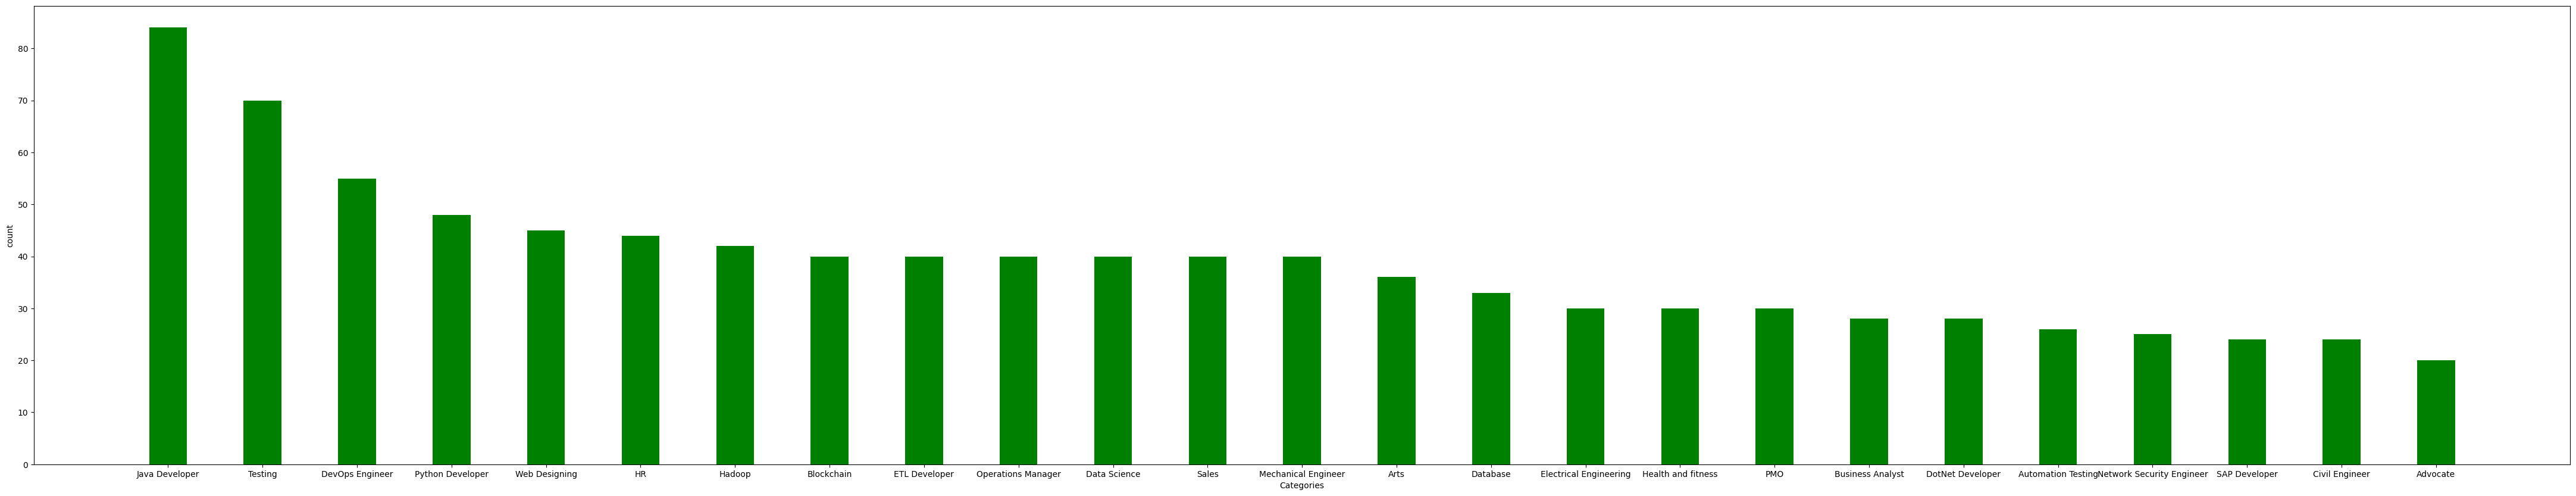

In [14]:
fig = plt.figure(figsize=(55, 10))
plt.bar(
    df["Category"].value_counts().keys(),
    df["Category"].value_counts().values,
    width=0.4,
    color="green",
)
plt.xlabel("Categories")
plt.ylabel("count")


<div class="alert alert-block alert-info"> <h3>📌Observation:</h3> <br>
<p style='color:black;'>

- Based on the analysis of the resume data, it can be concluded that the majority of the candidates have mentioned their skills as **Java Developers and Testing**, followed by Devops.
- The Data Science category ranks **11th out of 25 categories**, with only `40` records available.
- The **Advocate category** has the least number of records with only `20` resumes available.

</p>
</div>


## To identify matching words and phrases between the 'Category' and 'Resume' columns, the two columns are merged.


In [15]:
df["info"] = df["Category"] + " " + df["Resume"]


## Removing Punctuations in newly creating info column


In [16]:
# Define a function to remove punctuation from text

file_name = 'Files/after_remove_punctuation.csv'

# Check if the file already exists
if os.path.isfile(file_name):
    # If the file exists, delete it
    os.remove(file_name)
    
def remove_punctuation(text):
    # Use a list comprehension to remove all punctuation characters from the text
    text_punctuation = ''.join([char for char in text if char not in string.punctuation])
    return text_punctuation

# Apply the remove_punctuation() function to the 'info' column of the DataFrame 'df', and store the result in a new column called 'clean_punctuation'
df['clean_punctuation'] = df['info'].apply(lambda x: remove_punctuation(x))

# Save the modified DataFrame to a CSV file with the same name, without including the index column
df.to_csv(file_name, index=False)


## Tokenization

In [17]:

# Define a function to tokenize text
def token(text):
    # Split the text into tokens based on non-word characters
    tokens = re.split('\W+', text)
    return tokens

# Apply the tokenization function to the 'info' column of the DataFrame 'df', and store the result in a new column called 'after_tokenization'
df['after_tokenization'] = df['info'].apply(lambda x: token(x))

# Define the output file name
output_file = 'Files/after_tokenization.csv'

# Check if the file already exists, and if it does, remove it
if os.path.exists(output_file):
    os.remove(output_file)

# Save the modified DataFrame to a CSV file named 'after_tokenization.csv', without including the index column
df.to_csv(output_file, index=False)


## pos tagging

In [18]:
# Import the necessary libraries

from nltk import pos_tag

# Define a function to perform part-of-speech tagging on a given text
def pos_tag(text):
    # Use the nltk.pos_tag() function to assign part-of-speech tags to each token in the text
    pos_text = nltk.pos_tag(text)   
    return pos_text

# Apply the pos_tagging() function to the 'after_tokenization' column of the DataFrame 'df', and store the result in a new column called 'after_pos_tagging'
df['after_pos_tagging'] = df['after_tokenization'].apply(lambda x: pos_tag(x))

# Define the output file name
output_file = 'Files/after_pos_tagging.csv'

# Check if the file already exists, and if it does, remove it
if os.path.exists(output_file):
    os.remove(output_file)

# Save the modified DataFrame to a CSV file named 'after_tokenization.csv', without including the index column
df.to_csv(output_file, index=False)

## Removing stopwords

In [19]:
# Import the stopwords from the NLTK library
stop_words = set(stopwords.words('english'))

# Define a function to remove stopwords from text
def remove_stopword(text):
    # Create a list comprehension to remove stopwords from the text
    re_sw = [word for word in text if word not in stop_words]
    return re_sw

# Apply the remove_stopword() function to the 'after_tokenization' column of the DataFrame 'df', and store the result in a new column called 'remove_sw'
df['remove_sw'] = df['after_tokenization'].apply(lambda x: remove_stopword(x))

# Define the output file name
output_file = 'Files/after_re_sw.csv'

# Check if the file already exists, and if it does, remove it
if os.path.exists(output_file):
    os.remove(output_file)

# Save the modified DataFrame to a CSV file named 'after_re_sw.csv', without including the index column
df.to_csv(output_file, index=False)


## Lemmatization

In [20]:
# Initialize the WordNetLemmatizer
ln = nltk.WordNetLemmatizer()

# Define a function to lemmatize text
def lemm(text):
    # Apply lemmatization to each word in the text using the WordNetLemmatizer
    z = [ln.lemmatize(word) for word in text]
    return z

# Apply the lemmatization function to the 'remove_sw' column of the DataFrame 'df', and store the result in a new column called 'after_lemmatization'
df['after_lemmatization'] = df['remove_sw'].apply(lambda x: lemm(x))

# Define the output file name
output_file = 'Files/after_lemmatization.csv'

# Check if the file already exists, and if it does, remove it
if os.path.exists(output_file):
    os.remove(output_file)

# Save the modified DataFrame to a CSV file named 'after_lemmatization.csv', without including the index column
df.to_csv(output_file, index=False)

# Load the 'en_core_web_sm' model from spaCy
nlp = spacy.load("en_core_web_sm")

## Displaying Noun phrases in each column

In [22]:
# Define a function to extract noun phrases from text
def noun_phrases(text):
    # Concatenate the list of words into a single string
    x = ' '.join([y for y in text])
    # Use spaCy to parse the text and extract noun phrases
    doc = nlp(x)
    return [chunk.text for chunk in doc.noun_chunks]

# Apply the noun_phrases() function to the 'after_lemmatization' column of the DataFrame 'df',
# and store the result in a new column called 'noun_phrases'
df['noun_phrases'] = df['after_lemmatization'].apply(lambda x: noun_phrases(x))

# Print the 'noun_phrases' column of the DataFrame 'df'
print(df['noun_phrases'])


# Define the output file name
output_file = 'Files/after_noun_phrases.csv'

# Check if the file already exists, and if it does, remove it
if os.path.exists(output_file):
    os.remove(output_file)

df.to_csv(output_file, index=False)


0      [Data Science Skills Programming Languages Pyt...
1      [Data Science Education Details May 2013 May 2...
2      [Data Science Areas Interest Deep Learning Con...
3      [Data Science Skills â R â Python, SAP, HANA, ...
4      [Data Science Education Details MCA YMCAUST Fa...
                             ...                        
957    [Computer Skills â Proficient MS office, Word ...
958    [Testing â Willingness, challenge, Positive th...
959    [Testing PERSONAL SKILLS â Quick learner â Eag...
960    [Testing COMPUTER SKILLS SOFTWARE, KNOWLEDGE M...
961    [Testing Skill Set OS Windows XP, 2012 Languag...
Name: noun_phrases, Length: 962, dtype: object


## Displaying Verb forms in each column

In [23]:
# Define a function to extract verb forms from text
def verb_forms(text):
  # Join the list of words in text into a single string
  x = ' '.join([y for y in text])
  # Use SpaCy to parse the text and extract the lemma of each verb
  doc = nlp(x)
  return [token.lemma_ for token in doc if token.pos_ == "VERB"]

# Apply the verb_forms() function to the 'after_lemmatization' column of the DataFrame 'df', and store the result in a new column called 'verb_forms'
df['verb_forms'] = df['after_lemmatization'].apply(lambda x: verb_forms(x))
df['verb_forms']


0      [learn, learn, boost, embed, model, understand...
1      [learn, sagar, deploy, learn, miss, encode, sc...
2      [ltspice, ENTHUSIAST, excel, mathematic, work,...
3      [learn, involve, analyse, come, give, carry, p...
4                                                     []
                             ...                        
957    [test, work, motivate, check, follow, conduct,...
958    [accept, declare, mention, bear, mention, perf...
959    [learn, conduct, prepare, inverter, set, cause...
960                             [wind, use, use, design]
961    [test, report, handle, test, execute, coordina...
Name: verb_forms, Length: 962, dtype: object

## Displaying named entities

In [24]:
# Define a function to extract named entities from text
def named_entities(text):
    # Join the text into a single string
    x=' '.join([y for y in text])
    
    # Use spaCy to extract named entities from the text
    doc=nlp(x)
    
    # Return a list of the named entities found in the text
    return [entity.text for entity in doc.ents]

# Apply the named_entities() function to the 'after_lemmatization' column of the DataFrame 'df',
# and store the result in a new column called 'named_entities'

df['named_entities']=df['after_lemmatization'].apply(lambda x:named_entities(x))
# Print the 'named_entities' column of the DataFrame 'df'
df['named_entities']

0      [Sql Java JavaScript JQuery Machine, Cassandra...
1      [Data Science Education, May 2013, May 2017, M...
2      [Data Science Areas Interest Deep Learning Con...
3      [Tableau, SAP HANA, SAP HANA PAL, SAP Lumira, ...
4      [Data Science Education Details, Haryana Data ...
                             ...                        
957    [Word Basic Excel Power point, Bachelor Electr...
958    [Team Player, June 2015, June 2012, Abacus Ele...
959    [Eagerness, Competitive, January 2012, January...
960    [MS Power Point MS Office C Protius PCB Design...
961    [Skill Set OS, 2005 2008 2012, January 2016, J...
Name: named_entities, Length: 962, dtype: object

## Merging noun phrases,verb forms,named entities as a single column to find the matched words & phrases

In [25]:
# Define a function to convert text to a set of unique lowercase words
def string(text):
    return set(' '.join([char for char in text]).lower().split(' '))

# Apply the string function to the sum of noun phrases, verb forms, and named entities for each row in the DataFrame, 
# and store the result in a new column called 'total_words'
df['total_words'] = (df['noun_phrases'] + df['verb_forms'] + df['named_entities']).apply(lambda x: string(x))

# Access the 'total_words' column for the first row in the DataFrame
df['total_words'][0]


{'24',
 '4',
 '6',
 'accelerate',
 'accelerating',
 'accounting',
 'action',
 'address',
 'analysis',
 'analytic',
 'analytics',
 'analyze',
 'and',
 'anomaly',
 'answer',
 'ask',
 'assist',
 'assisted',
 'associate',
 'assurance',
 'automate',
 'automated',
 'base',
 'based',
 'bayes',
 'blob',
 'boost',
 'bootstrap',
 'bot',
 'build',
 'case',
 'cassandra',
 'category',
 'chain',
 'chat',
 'chatbot',
 'classification',
 'classifier',
 'client',
 'clients',
 'cloud',
 'code',
 'coding',
 'comment',
 'company',
 'content',
 'core',
 'cosine',
 'cost',
 'counter',
 'create',
 'created',
 'css',
 'customer',
 'customize',
 'customized',
 'cv',
 'd3',
 'dashboard',
 'data',
 'database',
 'dc',
 'decision',
 'deep',
 'description',
 'details',
 'develop',
 'developed',
 'development',
 'different',
 'dimensionality',
 'discovery',
 'dispute',
 'doc2vec',
 'docker',
 'domain',
 'e',
 'education',
 'effective',
 'elastic',
 'elasticsearch',
 'embed',
 'end',
 'ensure',
 'entire',
 'ernst',
 

## Creating the no of skills matching column in each resume

In [26]:
def ct(text):
      # Initialize a counter variable to keep track of the number of skills matched
  count = 0
  # Iterate over each word in the input text
  for i in text:
    # Check if the word is in the skills_list
    if i in skills_list:
      # If the word is in the skills_list, increment the counter
      count += 1
  # Return the final count of matched skills
  return count

# Apply the ct() function to the 'total_words' column of the DataFrame 'df',
# and store the result in a new column called 'skills_matched'
df['skills_matched'] = df['total_words'].apply(lambda x: ct(x))
# Print the resulting DataFrame
df

,Category,Resume,info,clean_punctuation,after_tokenization,after_pos_tagging,remove_sw,after_lemmatization,noun_phrases,verb_forms,named_entities,total_words,skills_matched
0,Data Science,Skills * Programming Languages: Python (pandas...,Data Science Skills * Programming Languages: P...,Data Science Skills Programming Languages Pyt...,"[Data, Science, Skills, Programming, Languages...","[(Data, NNP), (Science, NNP), (Skills, NNP), (...","[Data, Science, Skills, Programming, Languages...","[Data, Science, Skills, Programming, Languages...",[Data Science Skills Programming Languages Pyt...,"[learn, learn, boost, embed, model, understand...","[Sql Java JavaScript JQuery Machine, Cassandra...","{docker, help, file, regression, team, end, is...",48
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Data Science Education Details \r\nMay 2013 to...,Data Science Education Details \r\nMay 2013 to...,"[Data, Science, Education, Details, May, 2013,...","[(Data, NNP), (Science, NNP), (Education, NNP)...","[Data, Science, Education, Details, May, 2013,...","[Data, Science, Education, Details, May, 2013,...",[Data Science Education Details May 2013 May 2...,"[learn, sagar, deploy, learn, miss, encode, sc...","[Data Science Education, May 2013, May 2017, M...","{regression, skill, art, implemented, data, se...",13
2,Data Science,"Areas of Interest Deep Learning, Control Syste...","Data Science Areas of Interest Deep Learning, ...",Data Science Areas of Interest Deep Learning C...,"[Data, Science, Areas, of, Interest, Deep, Lea...","[(Data, NNP), (Science, NNP), (Areas, NNP), (o...","[Data, Science, Areas, Interest, Deep, Learnin...","[Data, Science, Areas, Interest, Deep, Learnin...",[Data Science Areas Interest Deep Learning Con...,"[ltspice, ENTHUSIAST, excel, mathematic, work,...",[Data Science Areas Interest Deep Learning Con...,"{python2, skill, ltspice, marketing, machinery...",20
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Data Science Skills â¢ R â¢ Python â¢ SAP H...,Data Science Skills â¢ R â¢ Python â¢ SAP H...,"[Data, Science, Skills, â, R, â, Python, â, SA...","[(Data, NNP), (Science, NNP), (Skills, NNP), (...","[Data, Science, Skills, â, R, â, Python, â, SA...","[Data, Science, Skills, â, R, â, Python, â, SA...","[Data Science Skills â R â Python, SAP, HANA, ...","[learn, involve, analyse, come, give, carry, p...","[Tableau, SAP HANA, SAP HANA PAL, SAP Lumira, ...","{interact, end, raw, geography, telecom, uml, ...",48
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Data Science Education Details \r\n MCA YMCA...,Data Science Education Details \r\n MCA YMCA...,"[Data, Science, Education, Details, MCA, YMCAU...","[(Data, NNP), (Science, NNP), (Education, NNP)...","[Data, Science, Education, Details, MCA, YMCAU...","[Data, Science, Education, Details, MCA, YMCAU...",[Data Science Education Details MCA YMCAUST Fa...,[],"[Data Science Education Details, Haryana Data ...","{company, skill, java, c, data, ymcaust, educa...",11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,Testing Computer Skills: â¢ Proficient in MS ...,Testing Computer Skills â¢ Proficient in MS o...,"[Testing, Computer, Skills, â, Proficient, in,...","[(Testing, VBG), (Computer, NNP), (Skills, NNP...","[Testing, Computer, Skills, â, Proficient, MS,...","[Testing, Computer, Skills, â, Proficient, MS,...","[Computer Skills â Proficient MS office, Word ...","[test, work, motivate, check, follow, conduct,...","[Word Basic Excel Power point, Bachelor Electr...","{3, good, skill, acb, 7, powai, find, alarm, p...",12
958,Testing,â Willingness to accept the challenges. â ...,Testing â Willingness to accept the challeng...,Testing â Willingness to accept the challeng...,"[Testing, â, Willingness, to, accept, the, cha...","[(Testing, VBG), (â, JJ), (Willingness, NNP), ...","[Testing, â, Willingness, accept, challenges, ...","[Testing, â,

## Displaying the top-10 resumes which matched more number of skills

In [27]:
# Sort the DataFrame by the 'skills_matched' column in descending order
df.sort_values(by='skills_matched', inplace=True, ascending=False)

# Select the 'Category', 'Resume', and 'skills_matched' columns for the top rows
top_resumes = df[['Category', 'Resume', 'skills_matched']].head()

# Print the top resumes
print(top_resumes)

        Category                                             Resume   
37  Data Science  Education Details \r\n B.Tech   Rayat and Bahr...  \
17  Data Science  Education Details \r\n B.Tech   Rayat and Bahr...   
7   Data Science  Education Details \r\n B.Tech   Rayat and Bahr...   
27  Data Science  Education Details \r\n B.Tech   Rayat and Bahr...   
0   Data Science  Skills * Programming Languages: Python (pandas...   

    skills_matched  
37              49  
17              49  
7               49  
27              49  
0               48  


## Resumes which skills matched more than 40

In [28]:

df[df['skills_matched']>=40][['Category','Resume','skills_matched']]
len(df[df['skills_matched']>=40][['Category','Resume','skills_matched']])

44

<div class="alert alert-block alert-info"> <h3>📌Observation:</h3> <br>
<p style='color:black;'>

- There are **44** resumes where the count of matched skills is greater than or equal to 40.
</p>
</div>


## Skills matching values & their record counts

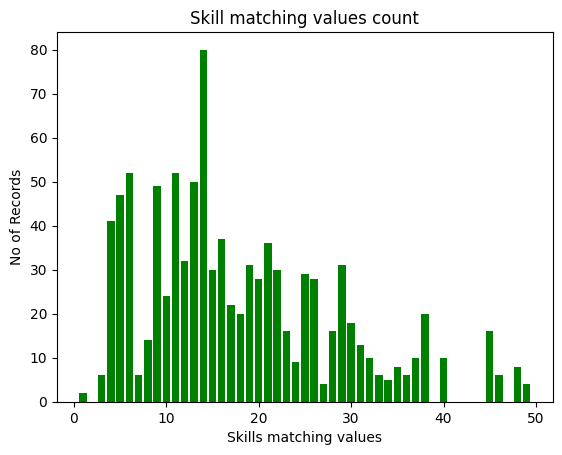

In [36]:
import matplotlib.pyplot as plt

# Count the frequency of each value in the 'skills_matched' column
value_counts = df['skills_matched'].value_counts()

# Create a bar plot of the value counts
plt.bar(value_counts.index, value_counts.values, color='green')

# Set the x-axis label
plt.xlabel('Skills matching values')

# Set the y-axis label
plt.ylabel('No of Records')

# Set the plot title
plt.title('Skill matching values count')


# Display the plot
plt.show()


<div class="alert alert-block alert-info"> <h3>📌Observation:</h3> <br>
<p style='color:black;'>

    - Most of the resumes are not properly matched the skillsets and matched skillsets are below 40.
    - Only **44 resumes** are matching more than **40 skill sets**.

</p>
</div>


-------------------------

<div class="alert alert-block alert-info" style='background-color: #daf7d5;'>
    <h3 style='font-size: 21px;'>📌Conclusion:</h3> 
    <br>
    <p style='font-size: 15px; color:black;'>

- Resumes were analyzed to match certain skills in the job market.
- The matching process involved various NLP techniques, including tokenization, **stop word removal**, **lemmatization**, and **named entity recognition**.
- The number of skill matches in each resume was calculated, and a histogram was plotted to show the distribution of the skill matching values.
- The analysis showed that there were **44 resumes with more than 40 skill matches**, which could be considered highly relevant for the job market.

</p>
</div>
